# Grid Search

<span>Beware full grid search can be more computation intensive depending on your parameters. We use a K-Nearest Neighbours model for its example. After the Full Grid Search is done, you can pull the best parameter for your model, and as well as take a look a the history of the previous combination of parameters.</span>
    
### Import Preliminaries

In [117]:
# Import modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import pandas as pd

from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings

# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting options
mpl.rcParams['figure.figsize'] = (8.0, 7.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [118]:
# Loading iris data set
iris = load_iris()
X, y = iris.data, iris.target

### Set up Model and Grid Search

In [119]:
# Initialize the random forest model
rf_model = RandomForestClassifier()

# Setting up the grid
grid = {'n_estimators':np.arange(0,100, 25)[1:],
        'max_depth':list(range(1,10,2)),
        'max_leaf_nodes':[5,10,25,50,75,100]}

# Initialize with GridSearchCV with grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=grid, 
                     scoring='accuracy', n_jobs=-1, refit=True, cv=10,
                     return_train_score=True)

# Fit search
grid_search.fit(X,y);

### Grid Search Score

In [120]:
# Print the best grid search score
print('Accuracy of best parameters: %.5f'%grid_search.best_score_)
print('Best parameters: %s' %grid_search.best_params_)

Accuracy of best parameters: 0.96667
Best parameters: {'max_depth': 3, 'max_leaf_nodes': 5, 'n_estimators': 75}


### Baseline Cross Validation Score


In [121]:
# print the baseline score of our model with default parameters
scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy', n_jobs=1)
print ('Baesline with default parameters: %.3f' %np.mean(scores))

Baesline with default parameters: 0.953


### Viewing Grid Scores

In [122]:
# View the raw grid search scores
grid_search.grid_scores_[:3]

[mean: 0.94667, std: 0.06532, params: {'max_depth': 1, 'max_leaf_nodes': 5, 'n_estimators': 25},
 mean: 0.95333, std: 0.06000, params: {'max_depth': 1, 'max_leaf_nodes': 5, 'n_estimators': 50},
 mean: 0.95333, std: 0.04269, params: {'max_depth': 1, 'max_leaf_nodes': 5, 'n_estimators': 75}]

In [123]:
# View the results in a dataframe
results = pd.DataFrame(grid_search.cv_results_)
results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.057,0.003,0.004,0.001,1,5,25,"{'max_depth': 1, 'max_leaf_nodes': 5, 'n_estim...",1.000,0.933,1.000,0.933,0.933,0.867,0.800,1.000,1.000,1.000,0.947,0.065,82,0.948,0.963,0.956,0.956,0.956,0.963,0.970,0.948,0.956,0.956,0.957,0.006
1,0.113,0.005,0.007,0.002,1,5,50,"{'max_depth': 1, 'max_leaf_nodes': 5, 'n_estim...",1.000,0.933,1.000,0.933,0.933,0.933,0.800,1.000,1.000,1.000,0.953,0.060,51,0.963,0.970,0.956,0.963,0.970,0.970,0.970,0.956,0.963,0.948,0.963,0.007
2,0.175,0.008,0.010,0.002,1,5,75,"{'max_depth': 1, 'max_leaf_nodes': 5, 'n_estim...",0.933,0.933,1.000,0.933,0.933,0.933,0.867,1.000,1.000,1.000,0.953,0.043,51,0.963,0.963,0.948,0.956,0.963,0.970,0.963,0.963,0.963,0.956,0.961,0.006


### Result Groupby

In [124]:
# Grid Search Groupby Function
def grid_search_groupby(results, param_1, param_2):
    params_df  = pd.DataFrame.from_dict(list(results.params.values))
    mean_test_score = results.mean_test_score
    result_shrt_df = pd.concat([mean_test_score, params_df], axis=1)
    result_groupby = result_shrt_df.groupby([param_1, param_2])['mean_test_score'].mean().unstack()
    return result_groupby

# View cross validation scores for between max_depth and n_estimator
result_groupby_1 = grid_search_groupby(results,'max_depth','n_estimators')
result_groupby_1

n_estimators,25,50,75
max_depth,,,
1,0.951,0.952,0.953
3,0.959,0.958,0.962
5,0.956,0.958,0.960
7,0.958,0.959,0.967
9,0.959,0.963,0.958


### Paramter Plot

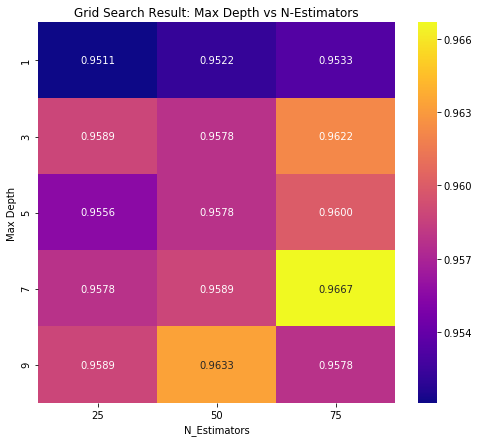

In [132]:
# Plot grid search results
mpl.rcParams['figure.figsize'] = (8.0, 7.0)
sns.heatmap(grid_search_groupby(results,'max_depth','n_estimators'),
           cmap='plasma', annot=True, fmt='.4f');
plt.title('Grid Search Result: Max Depth vs N-Estimators');
plt.xlabel('N_Estimators')
plt.ylabel('Max Depth');

##### Multiple Parameter Plot

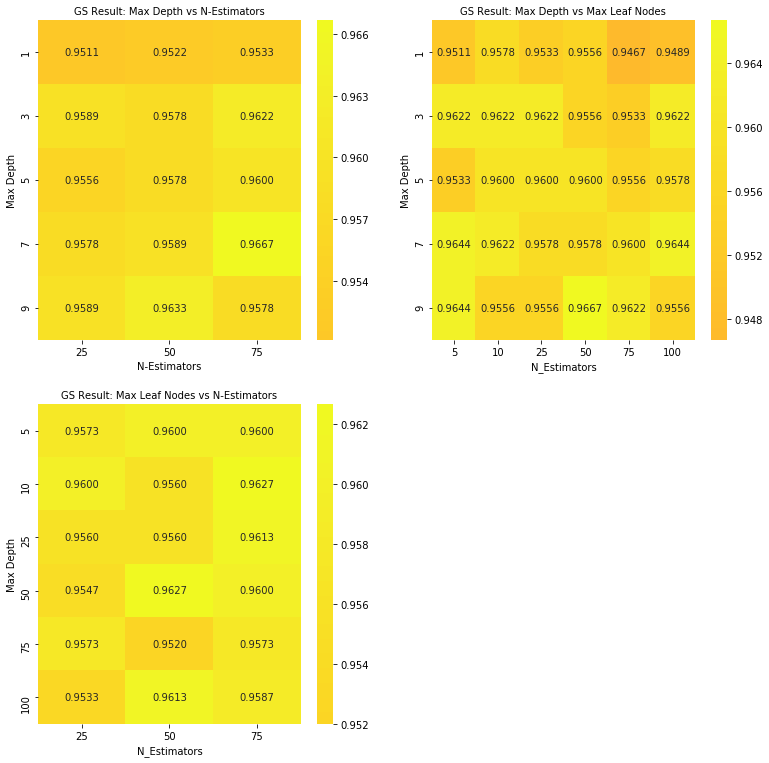

In [137]:
# Change figuresize
mpl.rcParams['figure.figsize'] = (20.0, 20.0)

# Set up grid
plt.figure()
fig = gridspec.GridSpec(3, 3)
grid_length = list(range(1, 3))
tuple_grid = [(i, j) for i in grid_length for j in grid_length]

plt.subplot2grid((3, 3), (0, 0))
sns.heatmap(grid_search_groupby(results,'max_depth','n_estimators'),
           cmap='plasma', annot=True, fmt='.4f', center=.90);
plt.title('GS Result: Max Depth vs N-Estimators', fontsize=10);
plt.xlabel('N-Estimators')
plt.ylabel('Max Depth');

plt.subplot2grid((3, 3), (0, 1))
sns.heatmap(grid_search_groupby(results,'max_depth','max_leaf_nodes'),
           cmap='plasma', annot=True, fmt='.4f', center=.90);
plt.title('GS Result: Max Depth vs Max Leaf Nodes', fontsize=10);
plt.xlabel('N_Estimators')
plt.ylabel('Max Depth');

plt.subplot2grid((3, 3), (1, 0))
sns.heatmap(grid_search_groupby(results,'max_leaf_nodes','n_estimators'),
           cmap='plasma', annot=True, fmt='.4f', center=.90);
plt.title('GS Result: Max Leaf Nodes vs N-Estimators', fontsize=10);
plt.xlabel('N_Estimators')
plt.ylabel('Max Depth');

Author: Kavi Sekhon